**Name:** Bryce Nicholas B. Co <br>
**Course:** Discrete Structure III <br>

Clustered Data:
       Index  Height(Inches)  Weight(Pounds)  Cluster
0          1        65.78331        112.9925        1
1          2        71.51521        136.4873        0
2          3        69.39874        153.0269        0
3          4        68.21660        142.3354        0
4          5        67.78781        144.2971        0
...      ...             ...             ...      ...
24995  24996        69.50215        118.0312        0
24996  24997        64.54826        120.1932        1
24997  24998        64.69855        118.2655        1
24998  24999        67.52918        132.2682        0
24999  25000        68.87761        124.8742        0

[25000 rows x 4 columns]


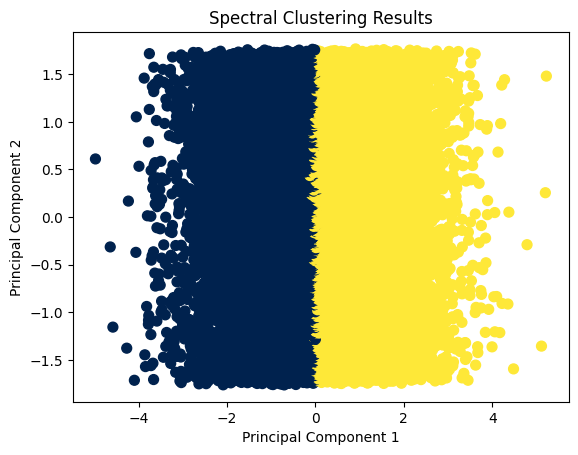

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Load the dataset
data = pd.read_csv('SOCR-HeightWeight.csv')
numeric_data = data

# Handle missing values
imputer = SimpleImputer(strategy='mean')
numeric_data_imputed = pd.DataFrame(imputer.fit_transform(numeric_data), columns=numeric_data.columns)

# Standardize the data
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data_imputed)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
numeric_data_pca = pca.fit_transform(numeric_data_scaled)

# Perform spectral clustering
n_clusters = 2  
spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', assign_labels='kmeans', random_state=42)
labels = spectral.fit_predict(numeric_data_scaled)

# Add the cluster labels to the original dataset
data['Cluster'] = labels

# Display the cluster assignments
print("Clustered Data:")
print(data)

# Visualize the clustering results with PCA
plt.scatter(numeric_data_pca[:, 0], numeric_data_pca[:, 1], c=labels, s=50, cmap='cividis')
plt.title('Spectral Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**CONCLUSION:**
<br><br>
*The code attempts to cluster the data using Spectral Clustering after preprocessing steps like missing value imputation, standardization, and dimensionality reduction via PCA. The visualization aims to show the clusters formed in a reduced 2D space based on PCA components. The effectiveness of the clustering approach can be assessed visually through the plotted clusters and their separation.*

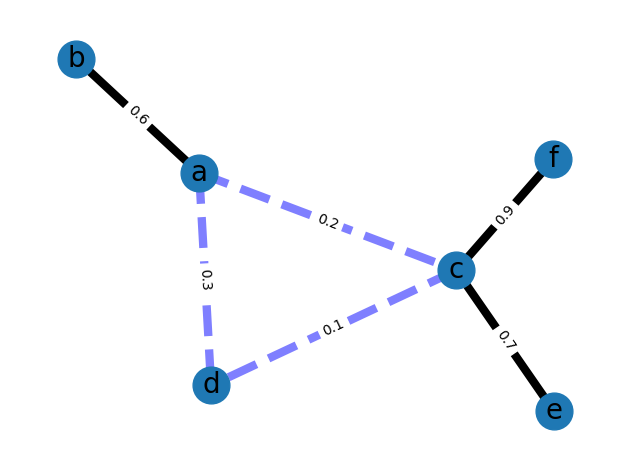

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

**ANSWER:**

In [7]:
import matplotlib.pyplot as plt
import networkx as nx

graph = nx.Graph()
graph.add_edge("a", "b", weight=0.6)
graph.add_edge("a", "c", weight=0.2)
graph.add_edge("c", "d", weight=0.1)
graph.add_edge("c", "e", weight=0.7)
graph.add_edge("c", "f", weight=0.9)
graph.add_edge("a", "d", weight=0.3)

eigenvector_centrality = nx.eigenvector_centrality_numpy(graph)
for node, centrality in eigenvector_centrality.items():
    print(f"{node}: {centrality}")


a: 0.5180745272221078
b: 0.21182323654035046
c: 0.5986753092298448
d: 0.45660141993768566
e: 0.2447781833973353
f: 0.24477818339733545


Read about the application of network science

1. https://medium.com/social-media-theories-ethics-and-analytics/network-analysis-from-social-media-data-with-networkx-13605d711590

2. http://snap.stanford.edu/class/cs224w-2011/proj/tbower_Finalwriteup_v1.pdf

3. Based on the readings provided; think about an interesting topic that you can find in Reddit (Not COVID-19, its already given in the reading material think of something else).

4. On the topic of your choosing develop a hypothesis and conduct a social network analysis. Find the eigenvector centrality. Which of the nodes are central in terms of eigenvectors? Develop a conclusion from your hypothesis.

Subreddit: Pewdiepie
Title: A PewDiePie subreddit.
Centrality Nodes based on corresponding Eigenvectors: [Redditor(name='notrarted17'), Redditor(name='jana_rr16'), Redditor(name='ConTroL2075'), Redditor(name='Aliashavoc'), Redditor(name='Zzeecell')]


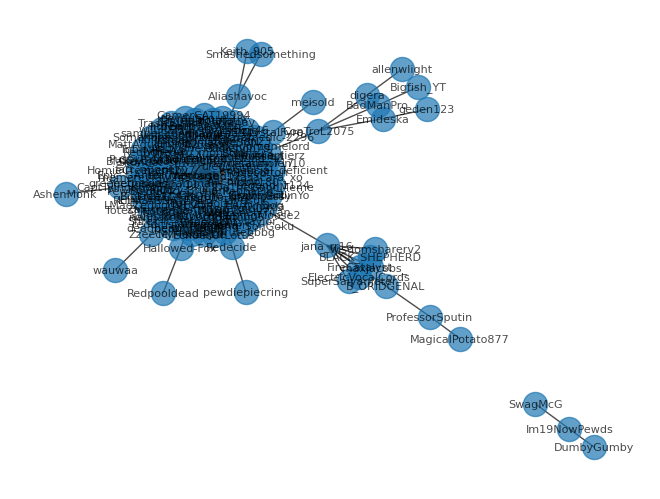

In [9]:
import praw
import networkx as nx
import matplotlib.pyplot as plt

reddit = praw.Reddit(
    client_id = "vUoHOE5-tid7L3cGX2uQNA",
    client_secret = "tGBxYVEk9oe6amYfKxLYBeSSJNJEIQ",
    user_agent = "Far-Customer-7696",
)

def print_subreddit_info(subreddit):
    print(f"Subreddit: {subreddit.display_name}")
    print(f"Title: {subreddit.title}")

def get_top_post_id(subreddit):
    return subreddit.top(limit=1).__next__().id

def create_social_network(post_id):
    submission = reddit.submission(id=post_id)
    G = nx.Graph()

    for comment in submission.comments.list():
        # Skip MoreComments objects
        if isinstance(comment, praw.models.MoreComments):
            continue

        # Check if the comment and parent comment have valid authors
        if comment.author and comment.parent() and comment.parent().author:
            G.add_edge(comment.author, comment.parent().author)

    return G

def perform_social_network_analysis(social_network):
    eigenvector_centrality = nx.eigenvector_centrality(social_network)
    sorted_nodes = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)
    top_nodes = sorted_nodes[:5]
    print("Centrality Nodes based on corresponding Eigenvectors:", top_nodes)

def visualize_network(social_network):
    pos = nx.spring_layout(social_network)  # Set layout algorithm
    nx.draw(social_network, pos, with_labels=True, font_size=8, font_color="black", alpha=0.7)
    plt.show()

# Choose a subreddit
subreddit_name = "Pewdiepie"
subreddit = reddit.subreddit(subreddit_name)

# Print subreddit information
print_subreddit_info(subreddit)

# Get the top post from the subreddit
post_id = get_top_post_id(subreddit)

# Create social network graph from comments
social_network = create_social_network(post_id)

# Perform social network analysis
perform_social_network_analysis(social_network)

# Visualize the network
visualize_network(social_network)

**HYPOTHESIS:**
<br><br>
*Highly active contributors in a subreddit, as identified by eigenvector centrality analysis in the corresponding social network graph formed from comments on the top post, are likely to have a significant impact on the interactions and discussions within the subreddit.*
<br><br>
**CONCLUSION:**
<br><br>
*Based on the analysis of the social network graph generated from comments on the top post in the "Pewdiepie" subreddit, the top 5 contributors identified by eigenvector centrality demonstrate the highest influence or centrality within the subreddit's interaction network. Their connections and engagement with other active users significantly impact the flow and direction of conversations, suggesting that these individuals play pivotal roles in shaping discussions and interactions within the community. This observation aligns with the assumption that highly central individuals in a social network can significantly influence the information flow and dynamics within the community, potentially contributing to its overall engagement and activity.*